<a href="https://colab.research.google.com/github/yaman9675/Loan-EMI-Payment-Default-Prediction/blob/main/Yaman_Loan_EMI_Default_Payment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

## The main business objective of this project is to predict such default payments of customers by building a machine learning model. This model would help in predicting if a given customer might default his payments or not, when given some features.

#<b>From the given dataset, you have to analyse the data and have to create an efficient model that will predict whether the user will pay back the 1st EMI credit amount within 5 days after the 1st installment date or not.  

> 1:success

> 0:failure

The label column is your target column. 

In the Description sheet, you have the attribute descriptions.

All The Best!

# **DATA DESCRIPTION**

## The dataset here is sourced from an Indonesian telecom company which provides loan to its customers in the form of recharge amounts. The data set contains 209593 rows and 37 columns.

## The definitions of the columns are given as follows:

### **label** -	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}.
### **msisdn** -	mobile number of user.
### **aon**	- age on cellular network in days.
### **daily_decr30** - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah).
### **daily_decr90** -Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah).
### **rental30** - Average main account balance over last 30 days.
### **rental90** - Average main account balance over last 90 days.
### **last_rech_date_ma** -	Number of days till last recharge of main account.
### **last_rech_date_da**	- Number of days till last recharge of data account.
### **last_rech_amt_ma** - 	Amount of last recharge of main account (in Indonesian Rupiah).
### **cnt_ma_rech30**	- Number of times main account got recharged in last 30 days.
### **fr_ma_rech30** - Frequency of main account recharged in last 30 days.
### **sumamnt_ma_rech30**	- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah).
### **medianamnt_ma_rech30** - Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah).
### **medianmarechprebal30** - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah).
### **cnt_ma_rech90** -	Number of times main account got recharged in last 90 days.
### **fr_ma_rech90** - Frequency of main account recharged in last 90 days.
### **sumamnt_ma_rech90**	- Total amount of recharge in main account over last 90 days (in Indonesian Rupiah).
### **medianamnt_ma_rech90** - Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah).
### **medianmarechprebal90** - Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah).
### **cnt_da_rech30**	- Number of times data account got recharged in last 30 days.
### **fr_da_rech30** - Frequency of data account recharged in last 30 days.
### **cnt_da_rech90**	- Number of times data account got recharged in last 90 days.
### **fr_da_rech90** - Frequency of data account recharged in last 90 days.
### **cnt_loans30** - Number of loans taken by user in last 30 days.
### **amnt_loans30** - Total amount of loans taken by user in last 30 days.
### **maxamnt_loans30**	- maximum amount of loan taken by the user in last 30 days.
### **medianamnt_loans30** - Median of amounts of loan taken by the user in last 30 days.
### **cnt_loans90** -	Number of loans taken by user in last 90 days.
### **amnt_loans90** -	Total amount of loans taken by user in last 90 days.
### **maxamnt_loans90**	- maximum amount of loan taken by the user in last 90 days.
### **medianamnt_loans90** - Median of amounts of loan taken by the user in last 90 days.
### **payback30** - Average payback time in days over last 30 days.
### **payback90** -	Average payback time in days over last 90 days.
### **pcircle**	- telecom circle.
### **pdate** -	date.

## **STEPS IN THE PROJECT**:

### 1. Data Cleaning
### 2. Exploratory Data Analysis (EDA)
### 3. Feature Engineering
### 4. Data Transformation
### 5. Model Building and Tuning

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Loan EMI Payment Default Prediction/sample_data_intw.csv')

In [ ]:
# A view of the data
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
# Information of all the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [ ]:
# Description of the data
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


## 1. Data Cleaning

In [ ]:
# Dropping the mobile number and index
data.drop(['Unnamed: 0', 'msisdn'], axis = 1, inplace = True)

### The unnamed column and msidn column can be dropped as they do not aid the analysis much.

In [ ]:
# Description of the data
data.describe(include ='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


### As seen the data contains values for both 30 and 90 days for all the features. Some analysis can be done on both these coloumns, which can help choose one set of features, either for 30 or 90 days. This can reduce dimensions and enhance the data.

In [ ]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pcircle', 'pdate'],
      dtype='object')

In [ ]:
# Columns only for 30 days
cols_30 = []
for column in data.columns:
  if '30' in column:
    cols_30.append(column)
print(cols_30)

['daily_decr30', 'rental30', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'payback30']


In [ ]:
# Columns only for 90 days
cols_90 = []
for column in data.columns:
  if '90' in column:
    cols_90.append(column)
print(cols_90)

['daily_decr90', 'rental90', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90']


In [ ]:
# Function sum of columns
def sums(df):
  '''Function returns the sums of the columns'''
  cols = df.columns
  col_sum_lst = []
  for col in cols:
    col_sum = sum(df[col])
    col_sum_lst.append(col_sum)
  
  return col_sum_lst

In [ ]:
# Sums of dataframe with 90 and 30 columns
sums_30 = sums(data.loc[:, cols_30])
sums_90 = sums(data.loc[:, cols_90])

In [ ]:
# Difference between columns
def diff(lst1, lst2):
  '''Function returns the differences between two lists'''
  diff_lst = []
  for x,y in zip(lst1,lst2):
    diff_lst.append((x-y)/(len(data)))
  return diff_lst

In [ ]:
# Difference between sums of 90 and 30 columns
diff(sums_90, sums_30)

[701.1127788350874,
 790.8246244864752,
 2.33737290844637,
 -3729.638340996193,
 4691.717194753642,
 51.77786948991617,
 -3759.902400834445,
 -262.53661496537205,
 -3749.448734217235,
 15.761938606217539,
 5.693377164313694,
 -267.9556128227205,
 -0.007951124321900064,
 0.9226587853756058]

### As seen, the difference per entry is not too large considering the magnitude of the numbers are high. Some columns have high differences which maybe due to outliers. 

In [ ]:
# Proportion of same entries for 30 and 90 information
same_data = []
for x,y in zip(cols_90, cols_30):
  per = len(data[data[x] == data[y]])/(len(data))
  same_data.append(per)
print(same_data)

[0.47096992743078253, 0.45971000939916884, 0.4159776328407914, 0.6345250079916791, 0.4159776328407914, 0.7208971673672308, 0.4841383061457205, 0.9807627163120906, 0.992141913136412, 0.691893336132409, 0.6953810480311843, 0.9876474882271832, 0.9818600812050021, 0.72426082932159]


### As there are columns for 30 and 90 days, columns for 30 days will be taken for this analysis. From observation of most values it is seen that the values for 90 and 30 days are similar. By logic, the information of 30 days would be crucial in faster detection of default payments.

In [ ]:
# Dataframe with columns about 30 days information
days_30 = data.drop(cols_90, axis = 1)

In [ ]:
# Head of the dataframe
days_30.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianmarechprebal30,cnt_da_rech30,fr_da_rech30,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,payback30,pcircle,pdate
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,...,7.50,0.0,0.0,2,12,6.0,0.0,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,61.04,0.0,0.0,1,12,12.0,0.0,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,66.32,0.0,0.0,1,6,6.0,0.0,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,0.00,0.0,0.0,2,12,6.0,0.0,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,29.00,0.0,0.0,7,42,6.0,0.0,2.333333,UPW,2016-06-22


In [ ]:
# Information of the dataframe
days_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   last_rech_date_ma     209593 non-null  float64
 5   last_rech_date_da     209593 non-null  float64
 6   last_rech_amt_ma      209593 non-null  int64  
 7   cnt_ma_rech30         209593 non-null  int64  
 8   fr_ma_rech30          209593 non-null  float64
 9   sumamnt_ma_rech30     209593 non-null  float64
 10  medianamnt_ma_rech30  209593 non-null  float64
 11  medianmarechprebal30  209593 non-null  float64
 12  cnt_da_rech30         209593 non-null  float64
 13  fr_da_rech30          209593 non-null  float64
 14  cnt_loans30           209593 non-null  int64  
 15  

In [ ]:
# Check for null values
days_30.isna().sum()

label                   0
aon                     0
daily_decr30            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
payback30               0
pcircle                 0
pdate                   0
dtype: int64

### No null values exist in the data.

In [ ]:
# Types of 'pcircle'
days_30['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [ ]:
# Dropping the 'pcircle' column
days_30.drop(['pcircle','pdate'], axis = 1, inplace = True)

### As 'pcircle' consists of only a single type, we can drop the column.

In [ ]:
# Distribution of the labels
days_30.value_counts('label')

label
1    183431
0     26162
dtype: int64

### The data contains 183431 records of success payments and 26162 failure payments of EMI. There is a certain imbalance between the two.

In [ ]:
# A view of the dataset for 30 days
days_30.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_da_rech30,fr_da_rech30,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,payback30
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,0.0,0.0,2,12,6.0,0.0,29.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,0.0,0.0,1,12,12.0,0.0,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,0.0,0.0,1,6,6.0,0.0,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,0.0,0.0,2,12,6.0,0.0,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,0.0,0.0,7,42,6.0,0.0,2.333333


In [ ]:
# Statistical description of the dataset for 30 days
days_30.describe()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_da_rech30,fr_da_rech30,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,payback30
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,2692.581910,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,262.578110,3749.494447,2.758981,17.952021,274.658747,0.054029,3.398826
std,0.330519,75696.082531,9220.623400,4308.586781,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,4183.897978,53885.414979,2.554502,17.379741,4245.264648,0.218039,8.813729
min,0.000000,-48.000000,-93.012667,-23737.140000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,280.420000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1083.570000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000
75%,1.000000,982.000000,7244.000000,3356.940000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,3.750000
max,1.000000,999860.755168,265926.000000,198926.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,99914.441420,999809.240107,50.000000,306.000000,99864.560864,3.000000,171.500000


### From the description of the data we can understand that columns such as, **age on network (aon)**, **daily_decr30**, **last_rech_date_ma** and **last_rech_date_da** cannot have negative values. These columns either show days or amount spent, both of which cannot be negative. We will turn these negative values into positve values.

In [ ]:
# Function to convert negative values to positive
def convert_negative(column):
  '''Function converts negative values to positive values'''
  if column < 0:
    return column * -1
  else:
    return column

In [ ]:
# Converting negative values of the columns to positive values
days_30['aon'] = days_30['aon'].apply(convert_negative)
days_30['daily_decr30'] = days_30['daily_decr30'].apply(convert_negative)
days_30['last_rech_date_da'] = days_30['last_rech_date_da'].apply(convert_negative)
days_30['last_rech_date_ma'] = days_30['last_rech_date_ma'].apply(convert_negative)

### Though outliers are natural to the data, there are some values that do not make sense logically, for example the max values in some columns related to the days show an extremely high value. This can be removed by capping. Absolute capping can be done for the columns that represent dates. Capping can be done for the last 10 years or 3650 days.

In [ ]:
# Capping the data of certain columns
days_30.drop(days_30[days_30['aon'] > 3650].index, axis = 0, inplace = True)
days_30.drop(days_30[days_30['last_rech_date_ma'] > 3650].index, axis = 0, inplace = True)
days_30.drop(days_30[days_30['last_rech_date_da'] > 3650].index, axis = 0, inplace = True)

In [ ]:
# Statistical description after capping
days_30.describe()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_da_rech30,fr_da_rech30,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,payback30
count,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000
mean,0.875211,655.553182,5380.907699,2692.368849,6.253126,0.936875,2063.480824,3.977531,3746.515820,7701.326648,1811.886161,3805.899054,264.140011,3755.575730,2.759233,17.954088,275.245681,0.053888,3.398727
std,0.330480,498.881020,9207.637286,4308.234776,9.455161,7.046790,2368.073827,4.247630,53702.717710,10127.082793,2066.511071,53667.544471,4199.859312,53919.978536,2.552092,17.355701,4247.252284,0.217733,8.805885
min,0.000000,1.000000,0.000000,-23737.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,243.000000,42.485500,280.535000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,519.000000,1472.062667,1083.940000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,34.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000
75%,1.000000,963.000000,7248.390500,3358.095000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,3.750000
max,1.000000,2440.000000,265926.000000,198926.110000,113.000000,115.000000,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,99914.441420,999809.240107,50.000000,306.000000,99864.560864,3.000000,171.500000


### The data now seems to have valid values in every column

## 2. Exploratory Data Analysis (EDA)

### Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


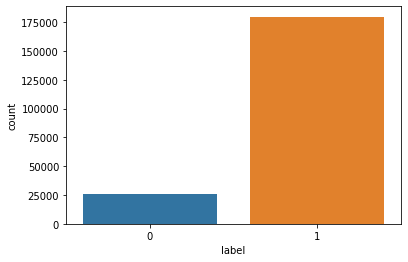

In [ ]:
# Distribution of the dependent variable
sns.countplot(days_30['label'])
sns.set_style('darkgrid')

### Imbalance in the dependent variable can be seen

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


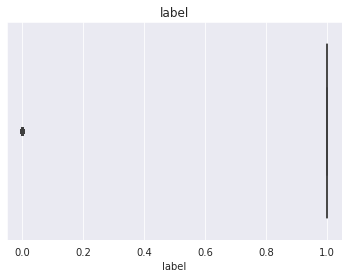

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


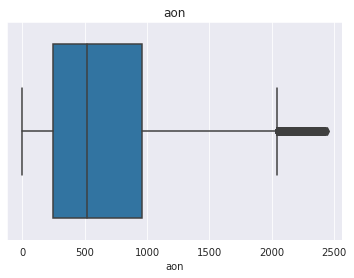

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


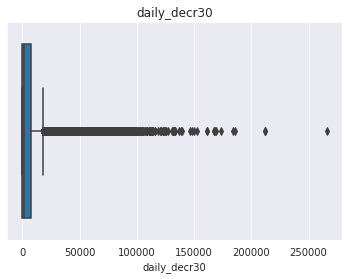

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


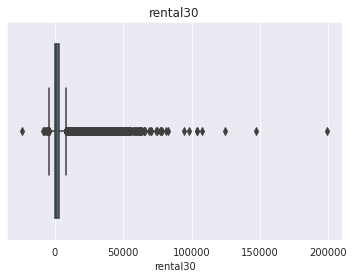

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


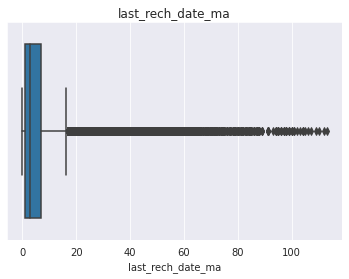

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


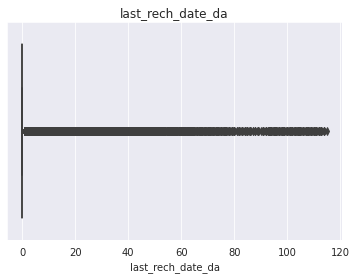

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


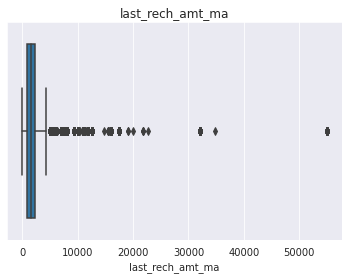

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


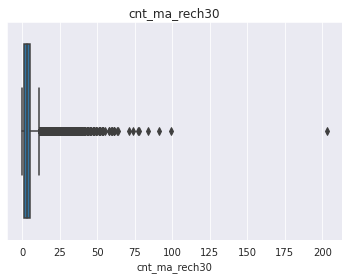

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


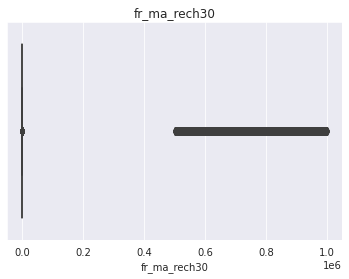

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


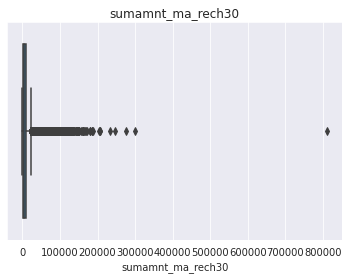

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


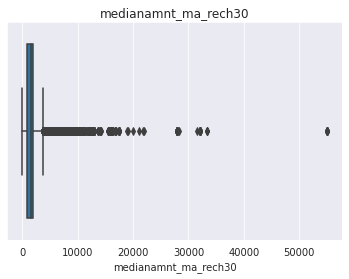

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


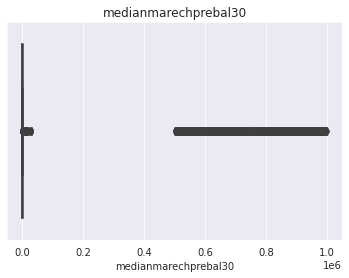

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


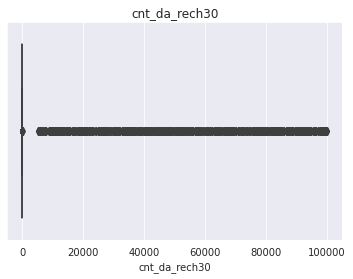

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


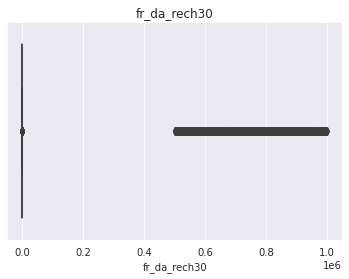

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


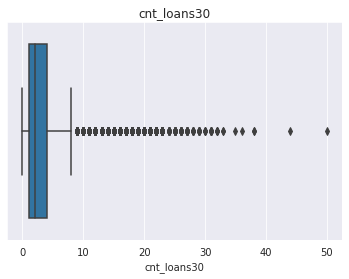

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


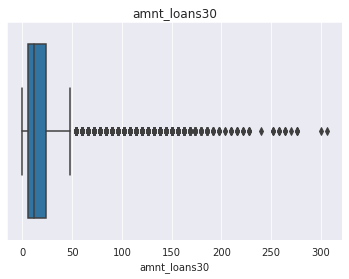

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


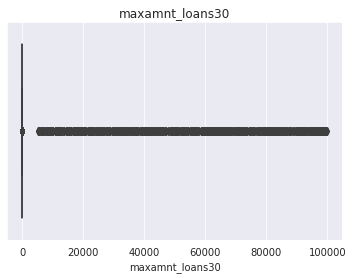

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


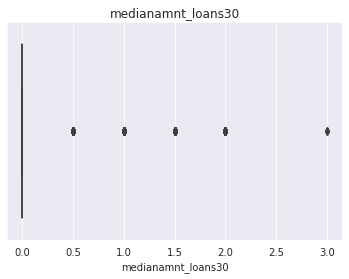

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


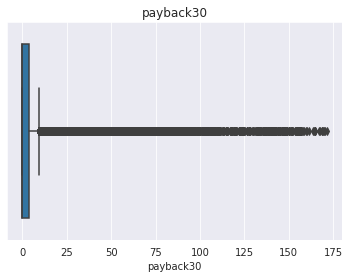

In [ ]:
# Boxplot of all the columns to check for outliers
for column in days_30.describe().columns:
  sns.boxplot(days_30[column])
  plt.title(column)
  plt.show()

### As seen all the columns have outliers, but these outliers are natural to the data. As the data here is of a telecom company, and it includes information of recharge amounts, balances, payments. These variables have a high variance and are not very standardised.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


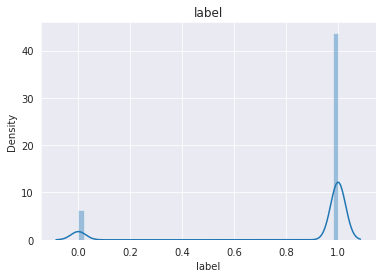

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


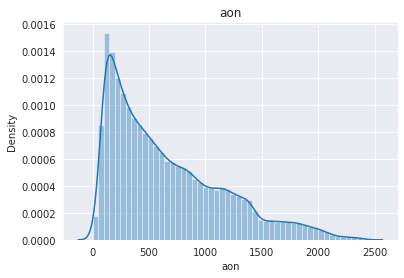

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


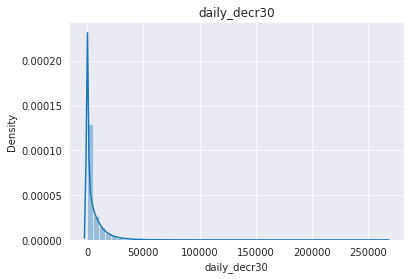

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


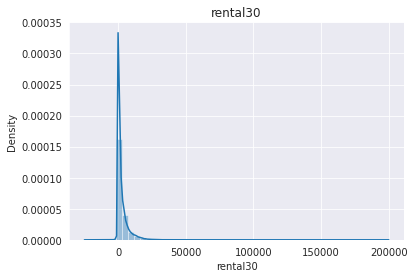

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


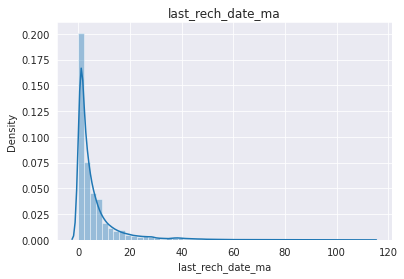

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


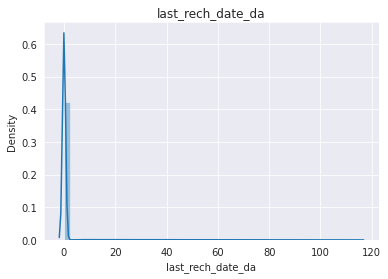

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


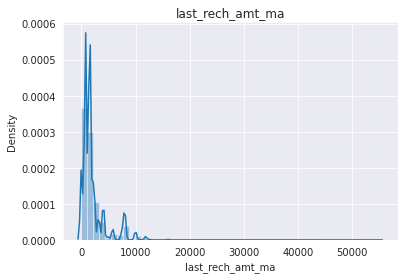

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


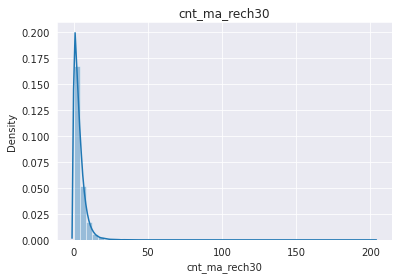

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


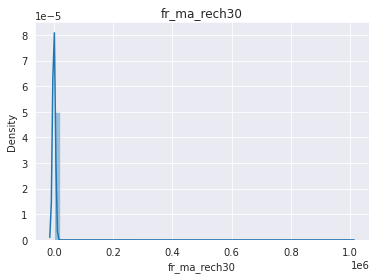

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


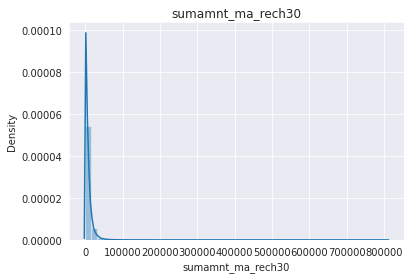

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


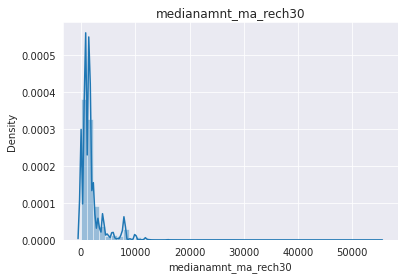

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


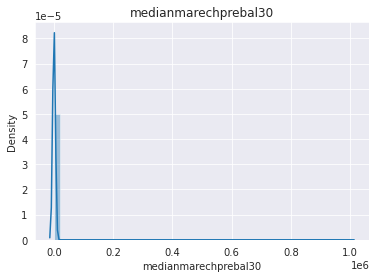

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


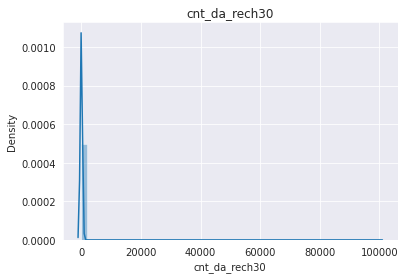

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


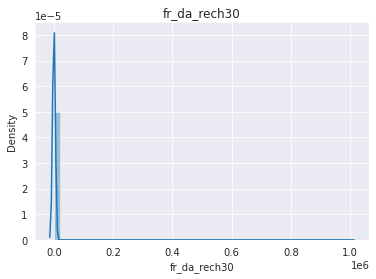

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


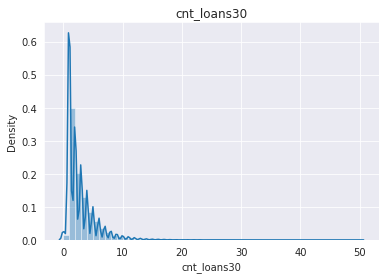

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


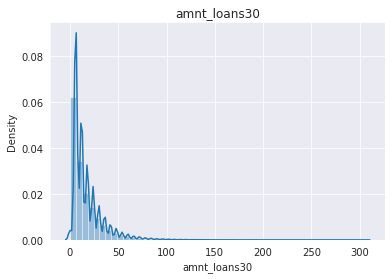

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


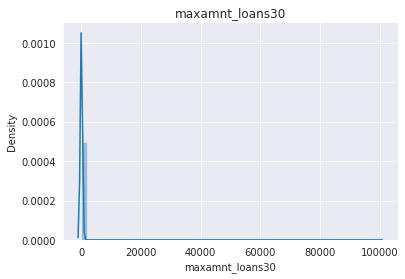

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


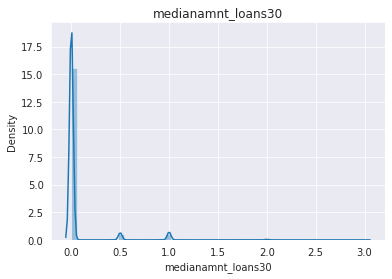

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


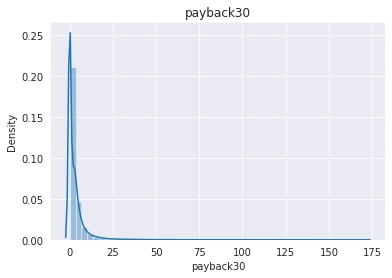

In [ ]:
# Distribution plot of all the columns
for column in days_30.columns:
  sns.distplot(days_30[column])
  plt.title(column)
  plt.show()

### Bivariate Analysis

 * ###  Does age on network effect average daily amount spent?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


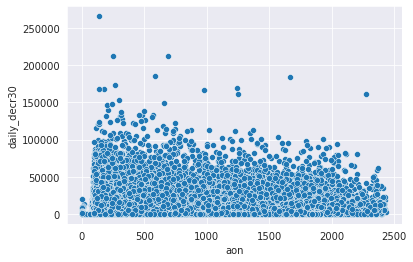

In [ ]:
# Scatterplot showing relation between aon and daily_decr30
sns.scatterplot(days_30['aon'], days_30['daily_decr30'])

### As age on network increases the average daily amount used reduces.

* ### Does age on network effect payment times?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


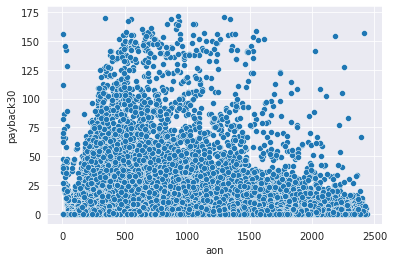

In [ ]:
# Understanding the relationship between aon and payback30
sns.scatterplot(days_30['aon'], days_30['payback30'])

### Customers who are on the network for longer pay quicker.

* ### How does age of the customer on network impact recharge recency, or longer recharges?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


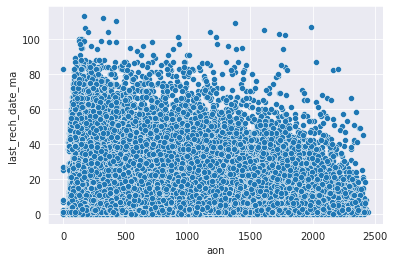

In [ ]:
# Understanding the relation between aon and last rech date ma
sns.scatterplot(days_30['aon'], days_30['last_rech_date_ma'])

### Customers who are longer on the network recharge more frequently.

* ### Is there a relation between last recharge amount and last recharge date?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


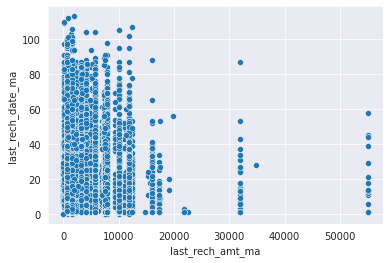

In [ ]:
# Understanding the relation between last recharge amount and last recharge date
sns.scatterplot(days_30['last_rech_amt_ma'], days_30['last_rech_date_ma'])

### Customers recharge for fix amounts, this is common for the telecom sector. Customers recharge for smaller amounts < 10000 indonesian rupiah. The usage varies. Though the amounts are less, some customers have used the amount for longer than others.

* ### Does total amount of recharges increase with number of recharges?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


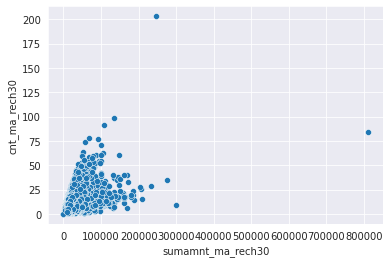

In [ ]:
# Understanding the relation between total recharges in 30 days and number of recharges in 30 days
sns.scatterplot(days_30['sumamnt_ma_rech30'], days_30['cnt_ma_rech30'])

### Sum of recharges and number of recharges are linear to an extent.

* ### Does larger amount of loan mean longer payback time?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


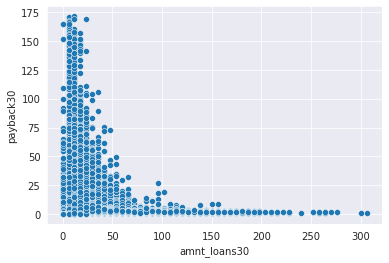

In [ ]:
# Relation between amount of loans and payback time
sns.scatterplot(days_30['amnt_loans30'], days_30['payback30'])

### In this situation, larger amounts of loans taken have been paid off quicker. Small amounts of loans have taken longer to pay.

* ### Do people with larger amounts of loan default more?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


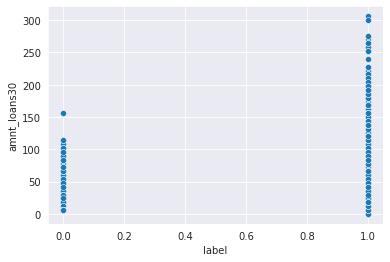

In [ ]:
# Understanding the relation of amount of loans and the target variable
sns.scatterplot(days_30['label'], days_30['amnt_loans30'])

### In this situation, default of loans are happening from people who have borrowed smalled amounts.

* ### Is there a relation between the average daily amount used in the last 30 days and the defaulters?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


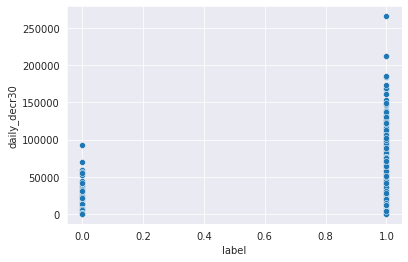

In [ ]:
# Relation between the target variable and the daily amount used
sns.scatterplot(days_30['label'], days_30['daily_decr30'])

### Customers who use lesser daily amounts on an average are more likely to default.

* ### Do people with higher average balance in the account pay quicker?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


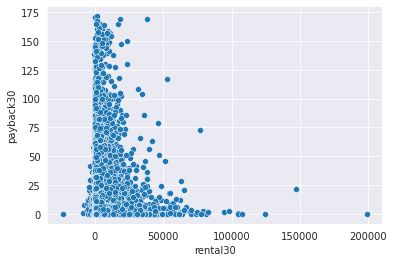

In [ ]:
# Relation between the average balance for 30 days and payback time
sns.scatterplot(days_30['rental30'], days_30['payback30'])

### In fact, people with lower average balances take a longer time to pay than people with higher average account balances.

* ### Are the loans being taken during recharge or later?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


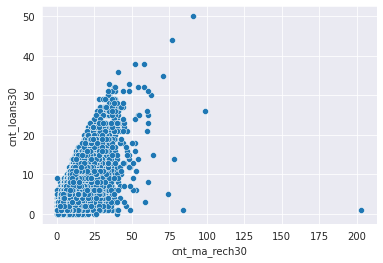

In [ ]:
# Scatterplot showing the relation between count of main account recharge and count of loans
sns.scatterplot(days_30['cnt_ma_rech30'], days_30['cnt_loans30'])

### Customers are taking the loans during recharge, it explains why the number of loans and number of recharges are highly correalted.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


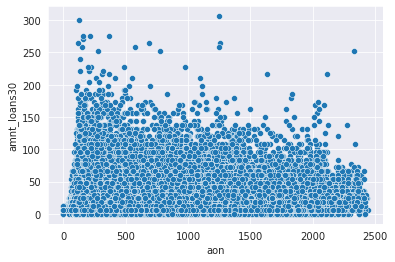

In [ ]:
# Plot between age on network and amount of loans taken in 30 days
sns.scatterplot(days_30['aon'], days_30['amnt_loans30'])

### As the age on network increases, the amount of loan taken by customers for 30 days reduces.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


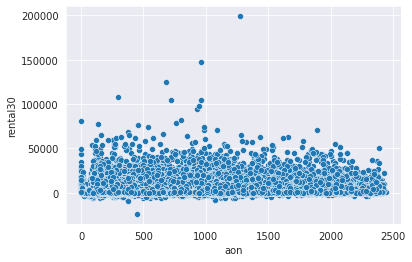

In [ ]:
# Plot between age on network and amount of loans taken in 30 days
sns.scatterplot(days_30['aon'], days_30['rental30'])

### Customers with a high age on network have lower negative account balances in the last 30 days compared to customers with lower age on network.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


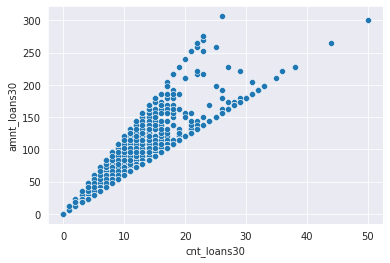

In [ ]:
# Plot between age on network and amount of loans taken in 30 days
sns.scatterplot(days_30['cnt_loans30'], days_30['amnt_loans30'])

### A linear relationship can be seen between the count of loans and the amount of loans.

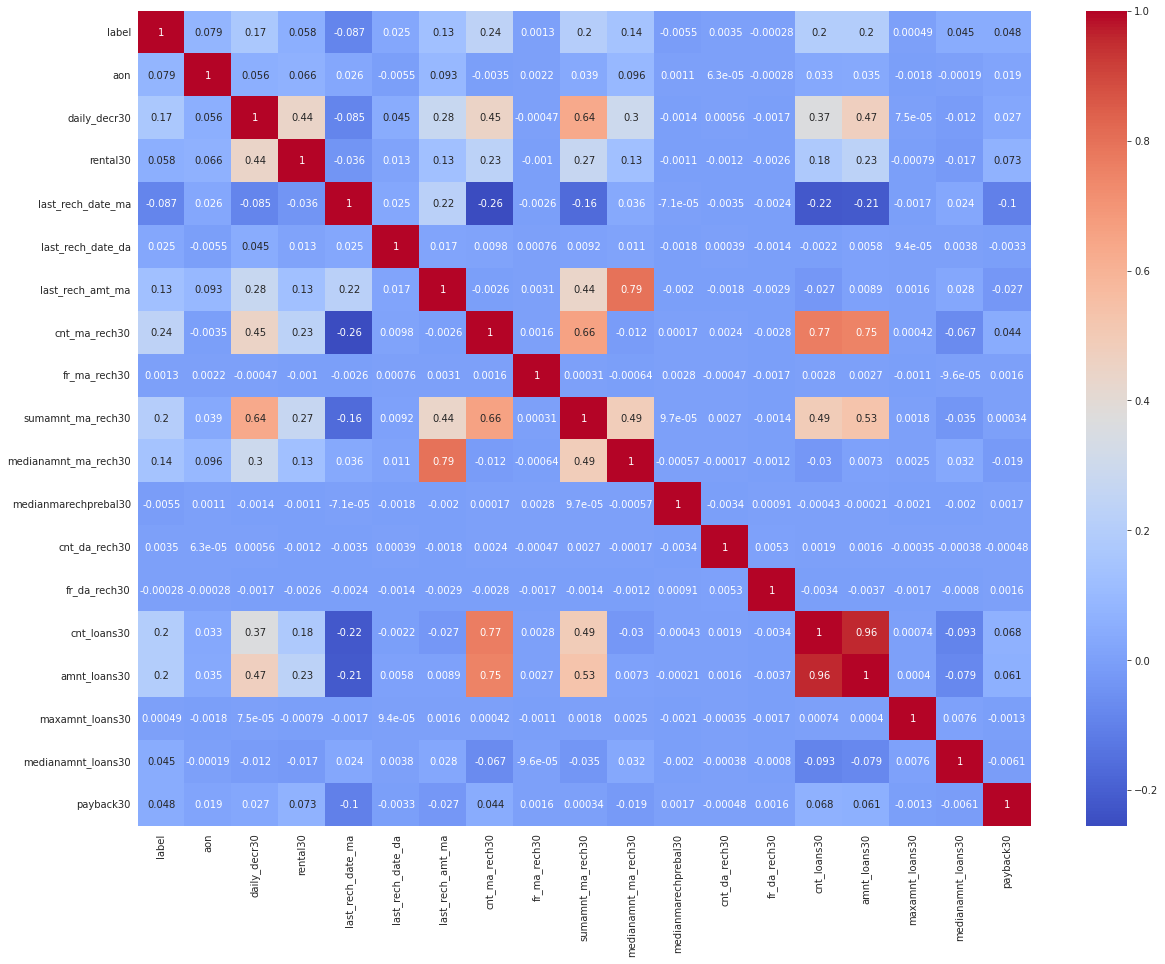

In [ ]:
# Correlation of various features
plt.figure(figsize = (20,15))
sns.heatmap(days_30.corr(), annot = True, cmap = 'coolwarm')

## 3. Feature Engineering

In [ ]:
# Statistical description of the data
days_30.describe()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_da_rech30,fr_da_rech30,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,payback30
count,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000,205435.000000
mean,0.875211,655.553182,5380.907699,2692.368849,6.253126,0.936875,2063.480824,3.977531,3746.515820,7701.326648,1811.886161,3805.899054,264.140011,3755.575730,2.759233,17.954088,275.245681,0.053888,3.398727
std,0.330480,498.881020,9207.637286,4308.234776,9.455161,7.046790,2368.073827,4.247630,53702.717710,10127.082793,2066.511071,53667.544471,4199.859312,53919.978536,2.552092,17.355701,4247.252284,0.217733,8.805885
min,0.000000,1.000000,0.000000,-23737.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,243.000000,42.485500,280.535000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,519.000000,1472.062667,1083.940000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,34.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000
75%,1.000000,963.000000,7248.390500,3358.095000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,3.750000
max,1.000000,2440.000000,265926.000000,198926.110000,113.000000,115.000000,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,99914.441420,999809.240107,50.000000,306.000000,99864.560864,3.000000,171.500000


### The customers can be split into different buckets depending on their age on network.

### Customers with aon:

### < 365 days : 0
### > 365 days and < 1825 days : 1
### >= 1825 : 2



In [ ]:
# Creating a function to divide customers into groups
def customer_buckets(column):
  '''Classifies customers into different buckets'''

  if column <= 365.0:
    return 0
  elif column > 365.0 and column <= 1825.0:
    return 1
  else:
    return 2

In [ ]:
# Applying the function to split customers into groups on the basis of aon
days_30['customer_group'] = days_30['aon'].apply(customer_buckets)

In [ ]:
# Average amount per loan
days_30['avg_amnt_per_loan'] = days_30['amnt_loans30']/days_30['cnt_loans30']

In [ ]:
# Filling the null values of average amount per loan with 0
days_30['avg_amnt_per_loan'].fillna(0, inplace = True)

In [ ]:
# Feature engineering an average recharge amount
days_30['avg_rech_amt'] = days_30['sumamnt_ma_rech30']/days_30['cnt_ma_rech30']

In [ ]:
# Filling the null values in the average recharge amount
days_30['avg_rech_amt'].fillna(0 , inplace = True)

In [ ]:
# Feature Engineering a total recharge frequency feature
days_30['sum_rech_freq'] = days_30['fr_ma_rech30'] + days_30['fr_da_rech30']

In [ ]:
# Dropping unnecessary columns
days_30.drop(['aon', 'amnt_loans30', 'cnt_loans30', 'sumamnt_ma_rech30', 'cnt_ma_rech30', 'fr_ma_rech30', 'fr_da_rech30'], axis = 1, inplace = True)

In [ ]:
# View of the data set after feature engineering
days_30.head()

,label,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_da_rech30,maxamnt_loans30,medianamnt_loans30,payback30,customer_group,avg_amnt_per_loan,avg_rech_amt,sum_rech_freq
0,0,3055.050000,220.13,2.0,0.0,1539,1539.0,7.50,0.0,6.0,0.0,29.000000,0,6.0,1539.000000,21.0
1,1,12122.000000,3691.26,20.0,0.0,5787,5787.0,61.04,0.0,12.0,0.0,0.000000,1,12.0,5787.000000,0.0
2,1,1398.000000,900.13,3.0,0.0,1539,1539.0,66.32,0.0,6.0,0.0,0.000000,1,6.0,1539.000000,0.0
3,1,21.228000,159.42,41.0,0.0,947,0.0,0.00,0.0,6.0,0.0,0.000000,0,6.0,0.000000,0.0
4,1,150.619333,1098.90,4.0,0.0,2309,2309.0,29.00,0.0,6.0,0.0,2.333333,1,6.0,2861.285714,2.0


In [ ]:
# Information of the dataset after feature engineering 
days_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205435 entries, 0 to 209592
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 205435 non-null  int64  
 1   daily_decr30          205435 non-null  float64
 2   rental30              205435 non-null  float64
 3   last_rech_date_ma     205435 non-null  float64
 4   last_rech_date_da     205435 non-null  float64
 5   last_rech_amt_ma      205435 non-null  int64  
 6   medianamnt_ma_rech30  205435 non-null  float64
 7   medianmarechprebal30  205435 non-null  float64
 8   cnt_da_rech30         205435 non-null  float64
 9   maxamnt_loans30       205435 non-null  float64
 10  medianamnt_loans30    205435 non-null  float64
 11  payback30             205435 non-null  float64
 12  customer_group        205435 non-null  int64  
 13  avg_amnt_per_loan     205435 non-null  float64
 14  avg_rech_amt          205435 non-null  float64
 15  

## 4. Data Preparation

### The data can now be split into independent and dependent variables. The data has values with different ranges and it can be scaled to have values in the same range.

In [ ]:
# Splitting the data into independent and dependent variables
X = days_30.iloc[:,1:]
y = days_30.iloc[:,0]

In [ ]:
# Scaling the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### As the dataset is imbalanced, oversampling in the form of **SMOTE** will be used.

In [ ]:
# Oversampling using smote
smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [ ]:
# Distribution of classes after oversampling
print(f'Count of class 0 : {list(y).count(0)}')
print(f'Count of class 1 : {list(y).count(1)}')

Count of class 0 : 179799
Count of class 1 : 179799


### After oversampling it can be confirmed that the data now has same number of 0 and 1 classes, the imbalance has been removed.

## 4. Model Building and Tuning


* ### Model Building

### Data is split into training and testing parts.

In [ ]:
# Dividing the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

In [ ]:
# Shape of each sub division
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of y_train {y_train.shape}')
print(f'Shape of X_test {X_test.shape}')
print(f'Shape of y_test {y_test.shape}')

Shape of X_train (287678, 15)
Shape of y_train (287678,)
Shape of X_test (71920, 15)
Shape of y_test (71920,)


###**Random Forest Classifier**

In [ ]:
# Instance of the classifiers
rf = RandomForestClassifier()

In [ ]:
# Fitting the data into the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Train and test predictions
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

In [ ]:
# Confusion matrix for training data
confusion_matrix(y_train, train_preds)

array([[143717,     44],
       [  1201, 142716]])

In [ ]:
# Confusion matrix for test data
confusion_matrix(y_test, test_preds)

array([[33585,  2453],
       [ 2877, 33005]])

In [ ]:
# Classification report for the training data
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    143761
           1       1.00      0.99      1.00    143917

    accuracy                           1.00    287678
   macro avg       1.00      1.00      1.00    287678
weighted avg       1.00      1.00      1.00    287678



In [ ]:
# Classification report for test  data
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     36038
           1       0.93      0.92      0.93     35882

    accuracy                           0.93     71920
   macro avg       0.93      0.93      0.93     71920
weighted avg       0.93      0.93      0.93     71920



In [ ]:
from sklearn.metrics import roc_curve

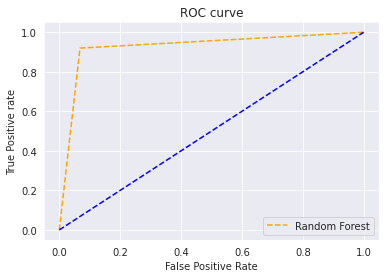

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, test_preds, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### As we seen the model is overfitting.

###**XGB classifier**

In [ ]:
# Instance of the classifiers
xgb = XGBClassifier()

In [ ]:
# Fitting data on the XGB Classifier
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
# Train and test predictions using the XGB Classifier
xgb_train_preds = xgb.predict(X_train)
xgb_test_preds = xgb.predict(X_test)

In [ ]:
# Confusion matrix of the XGB Classifier train data
confusion_matrix(y_train, xgb_train_preds)

array([[121542,  22219],
       [ 26766, 117151]])

In [ ]:
# Confusion matrix of XGB Classifier test data
confusion_matrix(y_test, xgb_test_preds)

array([[30392,  5646],
       [ 6527, 29355]])

In [ ]:
# XGB classification report of train data
print(classification_report(y_train, xgb_train_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83    143761
           1       0.84      0.81      0.83    143917

    accuracy                           0.83    287678
   macro avg       0.83      0.83      0.83    287678
weighted avg       0.83      0.83      0.83    287678



In [ ]:
# XGB classification report of test data
print(classification_report(y_test, xgb_test_preds))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     36038
           1       0.84      0.82      0.83     35882

    accuracy                           0.83     71920
   macro avg       0.83      0.83      0.83     71920
weighted avg       0.83      0.83      0.83     71920



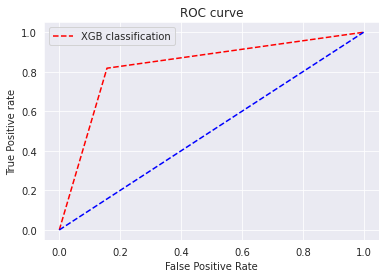

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, xgb_test_preds, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='XGB classification')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Comparing both the baseline models it is seen that the Random Forest Classifier overfits compared to the XGBoost Classifier, but the Random Forest Classifier performs better on the test data than the XGB Classifier

##<b>Hyperparameter tuning

### Comparing the baseline models it was seen that the **Random Forest Classifier** perfomed better but there was overfitting. Hyperparameter tuning can be done to minimize the overfitting. **Random search** will be used as a hyperparameter tuning technique.

In [ ]:
# Hyperparameters for tuning
param_dict = {'n_estimators' : [150,200], 
              'criterion':['gini'], 
              'max_depth' : [22,24], 
              'min_samples_split' : [7,8],
              'min_samples_leaf' : [4,6]}

In [ ]:
# Instane of the Random Search CV 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions= param_dict, scoring = 'recall', cv = 3)

In [ ]:
# Fitting data into the Random Search CV model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [22, 24],
                                        'min_samples_leaf': [4, 6],
                                        'min_samples_split': [7, 8],
                                        'n_estimators': [150, 200]},
                   scoring='recall')

In [ ]:
# Best Parameters
rf_random.best_params_

{'criterion': 'gini',
 'max_depth': 24,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

**best parameters of random forest after hypertuning**

{'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 4, 
 'min_samples_split': 8,
 'n_estimators': 150}

In [ ]:
# Train and test predicitions after hyperparameter tuning
rs_train_preds = rf_random.predict(X_train)
rs_test_preds = rf_random.predict(X_test)

In [ ]:
# Classification report on train data after hyperparameter tuning
print(classification_report(y_train, rs_train_preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93    143761
           1       0.95      0.91      0.93    143917

    accuracy                           0.93    287678
   macro avg       0.93      0.93      0.93    287678
weighted avg       0.93      0.93      0.93    287678



In [ ]:
# Classification report on test data after hyperparameter tuning
print(classification_report(y_test, rs_test_preds))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     36038
           1       0.90      0.89      0.89     35882

    accuracy                           0.90     71920
   macro avg       0.90      0.90      0.90     71920
weighted avg       0.90      0.90      0.90     71920



In [ ]:
# Confusion matrix on train predicitons after hyperparameter tuning
confusion_matrix(y_train, rs_train_preds)

array([[136501,   7260],
       [ 13257, 130660]])

In [ ]:
# Confusion matrix on test predictions after hyperparameter tuning.
confusion_matrix(y_test, rs_test_preds)

array([[32571,  3467],
       [ 4069, 31813]])

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, test_preds)
auc_score2 = roc_auc_score(y_test, xgb_test_preds)
auc_score3 = roc_auc_score(y_test, rs_test_preds)

print(auc_score1, auc_score2, auc_score3)

0.9258767412392568 0.8307151246029904 0.8951982585289773


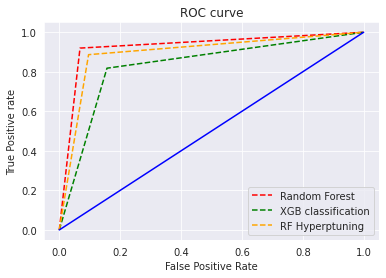

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, test_preds, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, xgb_test_preds, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rs_test_preds, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGB classification')
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='RF Hyperptuning')

plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### After hyperparameter tuning it can be seen that, the overfitting has reduced. The performance on test data has approximately remained the same.

# **CONCLUSION**

### The main objective of this problem was to predict default EMI payments. A model is successfully built which predicts default payments with a score of 90% recall. 

### The project has been conducted in 5 major steps:
### 1. Data Cleaning
### 2. Exploratory Data Analysis (EDA)
### 3. Feature Engineering
### 4. Data Transformation
### 5. Model Building and Tuning

### This project can have a huge impact for the telecom company, predicting default EMI payments, can help the company take necessary action against a particular customer. If the model predicts that a particular customer might default his EMI payments, the company can immediately take action on the customer before the losses pile up. A similar model can be used in the financial sector to detect default payments.

### This project has given me the opportunity to use my data science skills and apply business skills to solve the problem. It has given me an understanding of how machine learning can be applied in the financial sector.